# Overview
This is a starter notebook that shows how to quickly get started with Mentevo library. In this notebook we will see: 
- how to use the class *Experiment* to define the dynamical system that we want to simulate;
- how to easily visualise the results of the simulation using the function *plot_curves*;
- how to compute the performances using the function *compute_performance*.

### 1. Import the necessary libraries and functions.

In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

from mentevo import plot_curves
from mentevo import Experiment
from mentevo import compute_performance

### 2. Define the Dynamical System using the class *Expriment*.

First we need to define the dynamical system that we want to simulate and the simulation settings. This can be easily done with the class *Experiment*. This package is used to study and simulate the dynamics of balancing cognitive stability and flexibility for an individual and group of agents, in a collaborative task switching environment. Beside the parameters of the model, you can also define here the parameters of the simulation, such as total time and number of switches.

In this example case we have a group of 5 agents, with different gain values (heterogeneous group), in a 2-task switching environment.

The default parameters are set on the parameters used for the simulations of the paper. See documentation for more info.

In [2]:
experiment = Experiment(number_of_agents=5,
                        number_of_tasks=2,
                        communication_graph=None,
                        task_graph=None,
                        g=np.array([1.0, 3.0, 5.0, 7.0, 9.0]),
                        bias_value=0.1,
                        initial_state=None,
                        initial_steps=200,
                        total_time=2_200,
                        number_of_switches=8,
                        number_of_informed=None)

### 3. Simulate the dynamical system previously defined using *solve* function of the *Experiment* class.

Here the *solve* function is used to integrate and simulate the temporal evolution of the dynamical system. 
The results are represented by a matrix of dimension (*number_of_agents***number_of_tasks*, *total_time*). Here the results are printed to have a better idea of how they look like. 

In [3]:
simulation_results = experiment.solve()

print(simulation_results.shape)
print(simulation_results)

(10, 2200)
[[ 0.          0.          0.         ... -0.57457157 -0.57511096
  -0.57564464]
 [ 0.          0.          0.         ...  0.57457157  0.57511096
   0.57564464]
 [ 0.          0.          0.         ... -0.74664633 -0.74804334
  -0.74942825]
 ...
 [ 0.          0.          0.         ...  1.11022661  1.11357568
   1.11689824]
 [ 0.          0.          0.         ... -1.29964894 -1.30408411
  -1.3084846 ]
 [ 0.          0.          0.         ...  1.29964894  1.30408411
   1.3084846 ]]


### 4. Plot the simulation results using *plot_curves*.

The function *plot_curves* let you easily customize the plots of the simulation results. You can also choose if visualizing the task switching times and the cue vector. For more info look at the documentation.

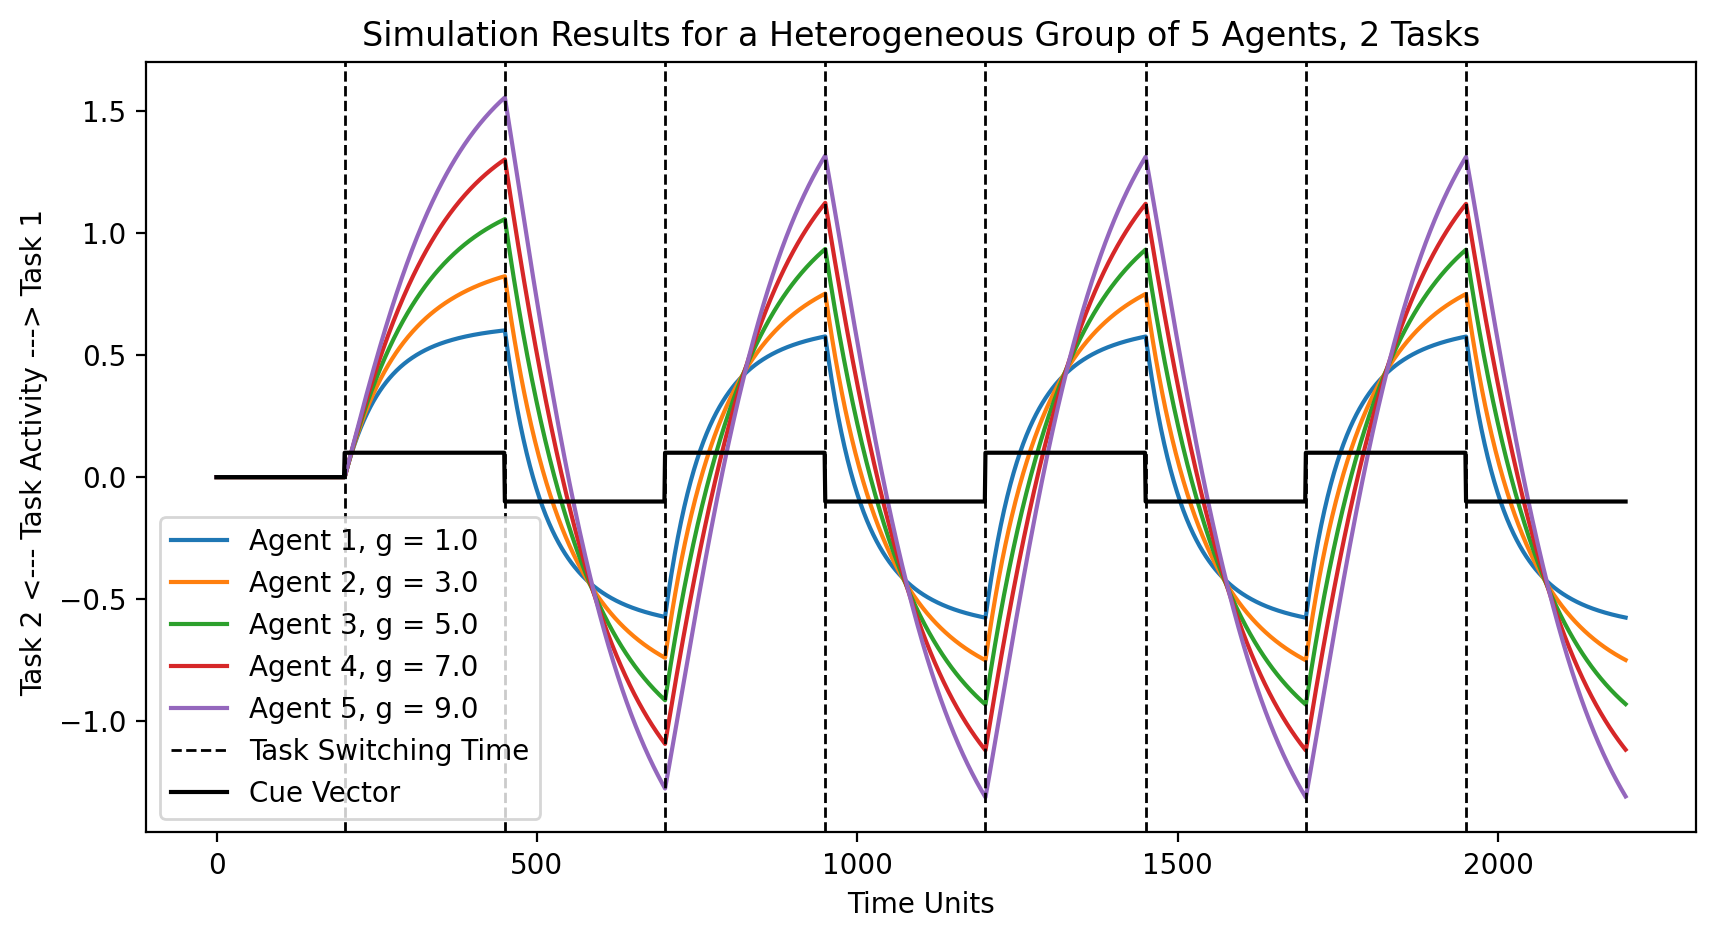

In [4]:
# Function to define the dimension of the figures
def set_size(w, h):
  plt.figure(figsize=(w, h))

set_size(10, 5)
plot_curves(experiment, simulation_results, title='Simulation Results for a Heterogeneous Group of 5 Agents, 2 Tasks', 
            y_label='Task 2 <--- Task Activity ---> Task 1 ', x_label='Time Units', show_legend=True, show_cue_vector=True,
            legend_labels=['Agent 1, g = 1.0', 'Agent 2, g = 3.0', 'Agent 3, g = 5.0', 'Agent 4, g = 7.0', 'Agent 5, g = 9.0'])

**Note**: for simplicity, we chose to plot the difference between activity on Task 1 and activity on Task 2 and normalized over 2. In this way, a positive value of the task activity means that the agent is more focused on the first task and a negative values means that it's more focused on the seocond task.

**Attention**: the number of switches corresponds to the number of switches in the task cue vector and correspond to the number of blocks of tasks in the experiment. It is different from the number of task-to-task switches (which is number_of_switches - 1) = 7 in this case.

In [5]:
print('Task switching times: ', experiment.task_switching_times)

Task switching times:  [ 200  450  700  950 1200 1450 1700 1950]


In [6]:
block_length = (experiment.total_time - experiment.initial_steps) / experiment.number_of_switches
print('Block length: ', block_length)

Block length:  250.0


To derive the task switching rate of the simulation environment:

In [7]:
rate = experiment.number_of_switches / (experiment.total_time - experiment.initial_steps)
print('Switching rate: ', rate)

Switching rate:  0.004


### 5. Compute the performances of the agents and the group performance using *compute_performance*.

Finally we compute the individual performances of the agents and the group performance using the function *compute_performance*. The metric used to calculate the performances is explained in more details in the documentation.

A scatter plot is then made to visualize how the individual performance depends on the gain value of the agents.

gain value = 1.0, individual performance = 1273.5662699058034
gain value = 3.0, individual performance = 1315.8526535885812
gain value = 5.0, individual performance = 1343.5799750360857
gain value = 7.0, individual performance = 1354.2851034044934
gain value = 9.0, individual performance = 1345.5289649978433
group performance =  6632.812966932807


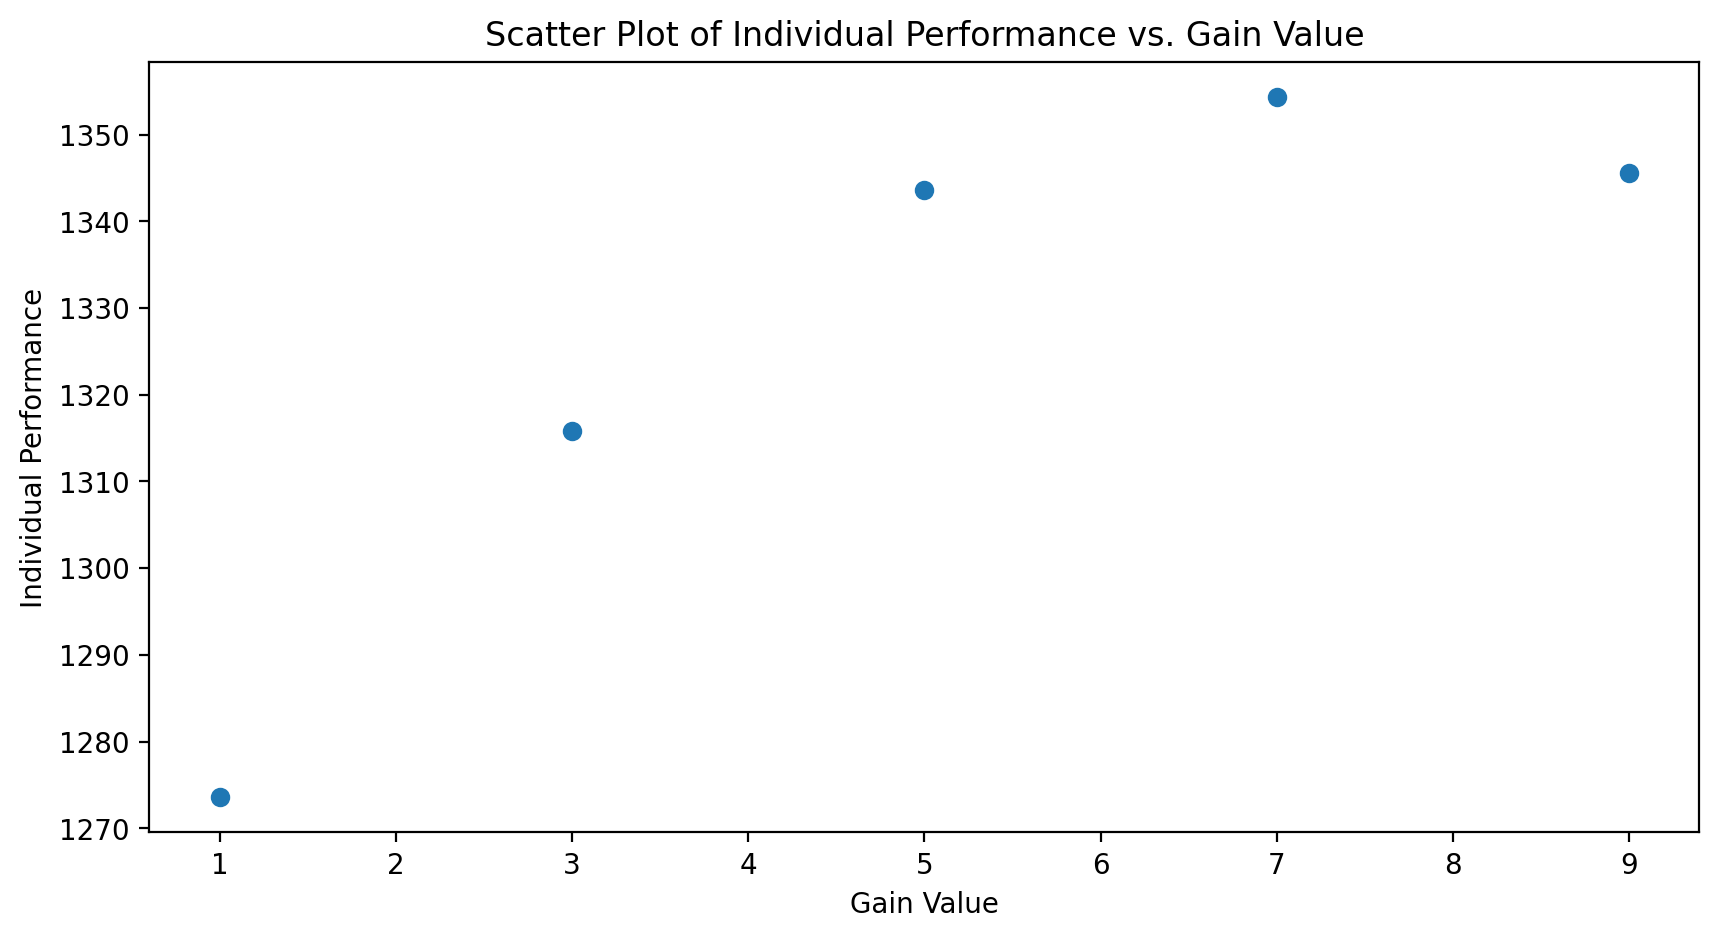

In [9]:
individual_performance, group_performance = compute_performance(experiment, simulation_results)

for g, s in zip(experiment.g, individual_performance):
    print(f'gain value = {g}, individual performance = {s}')

print('group performance = ', group_performance)

set_size(10, 5)
plt.scatter(experiment.g, individual_performance)
plt.title("Scatter Plot of Individual Performance vs. Gain Value")
plt.xlabel("Gain Value")
plt.ylabel("Individual Performance")

plt.show()